#پیش پردازش داده
نویسنده : مسعود جان بک لو

##خلاصه نوت بوک 

در این نوت بوک پیش پردازش مجموعه داده اصلی نمایش داده می شود هدف در این اینجا بهبود تکرار پذیری و نحوه برخورد با مجموعه اده بسیار کوچک است . 
هدف در این جا یافتن یک مجموعه داده کامل برای پیشبرد مطالعات و و به حداکثر رساندن تعداد ردیف هاست 

## مراحل پیش پردازش 
- مقابله با مقادیر مفقوده 
- مهندسی کردن ویژگی ها 
- ایجاد یک مجموعه داده کامل 

## کتابخانه های نوت بوک 

In [ ]:
0

33# Standard modules
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings('ignore')

# Missing Treatment
import missingno as msno

# Graphical modules
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# مقابله با مقادیر مفقوده 
## بارگذاری مجموعه داده 

In [ ]:
# Importing raw dataset
dataset_raw = pd.read_excel('dataset.xlsx')

In [ ]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(70), int64(4), object(37)
memory usage: 4.8+ MB


In [ ]:
# Drop unused ID column
dataset_raw.drop('Patient ID', axis=1, inplace=True)

In [ ]:
# Improve readability of columns
dataset_raw.columns = [col.lower().replace(' ','_') for col in dataset_raw.columns]

In [ ]:
dataset_raw['sars-cov-2_exam_result'].head()

0    negative
1    negative
2    negative
3    negative
4    negative
Name: sars-cov-2_exam_result, dtype: object

## تبدیل داده های غیر عددی به عددی 



In [ ]:
# Create mask
mask = {'positive': 1, 
        'negative': 0,
        'detected': 1, 
        'not_detected': 0,
        'not_done': np.NaN,
        'Não Realizado': np.NaN,
        'absent': 0, 
        'present': 1,
        'detected': 1, 
        'not_detected': 0,
        'normal': 1,
        'light_yellow': 1, 
        'yellow': 2, 
        'citrus_yellow': 3, 
        'orange': 4,
        'clear': 1, 
        'lightly_cloudy': 2, 
        'cloudy': 3, 
        'altered_coloring': 4,
        '<1000': 1000,
        'Ausentes': 0, 
        'Urato Amorfo --+': 1, 
        'Oxalato de Cálcio +++': 1,
        'Oxalato de Cálcio -++': 1, 
        'Urato Amorfo +++': 1}

# Apply mask
df = dataset_raw.replace(mask)


In [ ]:
df['sars-cov-2_exam_result'].head()

0    0
1    0
2    0
3    0
4    0
Name: sars-cov-2_exam_result, dtype: int64

## ایجاد یک ستون جدید برای وضعیت بستری بیمار 

In [ ]:
# Create a new unique column based in patient admission
admissions = ['patient_addmited_to_regular_ward_(1=yes,_0=no)',
              'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
              'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)']

# Evaluate the number of possibilities for three targets in a single column
patient_addmited_possibilities = list()
for i in range(0, len(df)):
    possibility=str(int(df.loc[i,admissions[0]])) + str(int(df.loc[i,admissions[1]])) + str(int(df.loc[i,admissions[2]]))
    patient_addmited_possibilities.append(possibility)

# Print result
print(sorted(set(patient_addmited_possibilities)))

['000', '001', '010', '100']


یک ستون جدید مرتبط با بستری بیمار به نام patient admission ایجاد کردم 

- دسته 0 : عدم بستری در بیمارستان 
- دسته 1: بستری در بخش عادی 
- دسته 2 : بستری در بخش نیمه ویژه 
- دسته 3 : بستری در بخش مراقبت های ویژه 

In [ ]:
## Create the new column
df['patient_admission'] = patient_addmited_possibilities

## Change the new column to num values
for i in range(0, len(df)):
    if df.loc[i, 'patient_admission'] == '000':
        df.loc[i, 'patient_admission'] = 0
    elif df.loc[i, 'patient_admission'] == '100':
        df.loc[i, 'patient_admission'] = 1
    elif df.loc[i, 'patient_admission'] == '010':
        df.loc[i, 'patient_admission'] = 2
    elif df.loc[i, 'patient_admission'] == '001':
        df.loc[i, 'patient_admission'] = 3
        
# Drop residual cols
df.drop(admissions, axis=1, inplace=True)

## See class distribution
df['patient_admission'].value_counts()

0    5474
1      79
2      50
3      41
Name: patient_admission, dtype: int64

## (1) پاک کردن ستون های خالی و یا ثابت  در مجموعه داده 
- ستون خالی : با توجه به نامش یعنی ستون هایی که فاقد هر گونه داده ای هستند 
- ستون ثابت : ستون هایی که فقط دارای یک مقدار می باشد 

In [ ]:
# Visualize wannabe categorical cols
for col in df.columns:
    if len(df[col].unique()) < 5:
        print(col, df[col].unique())

sars-cov-2_exam_result [0 1]
respiratory_syncytial_virus [nan  0.  1.]
influenza_a [nan  0.  1.]
influenza_b [nan  0.  1.]
parainfluenza_1 [nan  0.  1.]
coronavirusnl63 [nan  0.  1.]
rhinovirus/enterovirus [nan  1.  0.]
mycoplasma_pneumoniae [nan]
coronavirus_hku1 [nan  0.  1.]
parainfluenza_3 [nan  0.  1.]
chlamydophila_pneumoniae [nan  0.  1.]
adenovirus [nan  0.  1.]
parainfluenza_4 [nan  0.  1.]
coronavirus229e [nan  0.  1.]
coronavirusoc43 [nan  0.  1.]
inf_a_h1n1_2009 [nan  0.  1.]
bordetella_pertussis [nan  0.  1.]
metapneumovirus [nan  0.  1.]
parainfluenza_2 [nan  0.]
influenza_b,_rapid_test [nan  0.  1.]
influenza_a,_rapid_test [nan  0.  1.]
strepto_a [nan  1.  0.]
fio2_(venous_blood_gas_analysis) [nan  0.]
promyelocytes [        nan -0.10206207  9.79795933]
myeloblasts [nan  0.]
urine_-_esterase [nan  0.]
urine_-_hemoglobin [nan  0.  1.]
urine_-_bile_pigments [nan  0.]
urine_-_ketone_bodies [nan  0.]
urine_-_nitrite [nan]
urine_-_urobilinogen [nan  1.]
urine_-_protein [nan  

بیشتر متغیرهای مربوط به آزمایش ادرار خالی یا ثابت هستند این ستون ها عبارت اند از : 

`'mycoplasma_pneumoniae'
'd-dimer'
'partial_thromboplastin_time\xa0(ptt)\xa0'
'prothrombin_time_(pt),_activity'
'urine_-_sugar'
'urine_-_yeasts'
'urine_-_granular_cylinders'
'urine_-_hyaline_cylinders'
'myeloblasts'
'fio2_(venous_blood_gas_analysis)'
'urine_-_esterase','parainfluenza_2'
'urine_-_bile_pigments'
'urine_-_ketone_bodies'
'urine_-_protein'
'urine_-_urobilinogen'
'urine_-_nitrite'`

باید این ستون ها از مجموعه داده پاک شوند 

In [ ]:
# Columns to Drop
cols_to_drop = ['mycoplasma_pneumoniae',
                'd-dimer',
                'partial_thromboplastin_time\xa0(ptt)\xa0',
                'prothrombin_time_(pt),_activity',
                'urine_-_sugar',
                'urine_-_yeasts',
                'urine_-_granular_cylinders',
                'urine_-_hyaline_cylinders',
                'myeloblasts',
                'fio2_(venous_blood_gas_analysis)',
                'urine_-_esterase','parainfluenza_2',
                'urine_-_bile_pigments',
                'urine_-_ketone_bodies',
                'urine_-_protein',
                'urine_-_urobilinogen',
                'urine_-_nitrite']
# Remove it
df.drop(cols_to_drop, axis=1, inplace=True)

## (2) پاک کردن متغیرهایی که حاوی مقادیر مفقوده فقز برای موارد مثبت کرونایی هستند 
این یک نمونه از یک ستون ثابت می باشد 

In [ ]:
def calculate_nan_pct(df):
    '''Function to calculate % of nan and number of missing values for each column'''
    nan_per_column = pd.DataFrame(df.isna().sum(), columns=['nanValues']).reset_index()
    
    for i in range(0,len(nan_per_column)):
        nan_per_column.loc[i, 'nanValuesPct'] = 100*round(nan_per_column.loc[i, 'nanValues']/len(df),3)
    
    return nan_per_column

In [ ]:
# Dataframe for only positives
df_positive = df[df['sars-cov-2_exam_result'] == 1]
# Get nan report
nan_per_col = calculate_nan_pct(df_positive)
# Print cols to be removed
nan_per_col[nan_per_col['nanValuesPct'] == 100]

,index,nanValues,nanValuesPct
74,vitamin_b12,558,100.0
79,albumin,558,100.0


In [ ]:
# Remove it
df.drop(['vitamin_b12','albumin'], axis=1, inplace=True)

## (3) درک مقادیر مفقوده در مجموعه داده 
در این بخش بررسی ارتباط بین آزمایشات گرفته شده از بیمار و مقادیر مفقوده ارزیابی خواهد شد *.

In [ ]:
# Dataframe only with exams
exams_performed = df.drop(axis=1, columns=['patient_age_quantile', 'sars-cov-2_exam_result','patient_admission'] ,)
# Report
print('After the first cleaning step (removes) we have',len(exams_performed.columns),'columns.')

After the first cleaning step (removes) we have 86 columns.


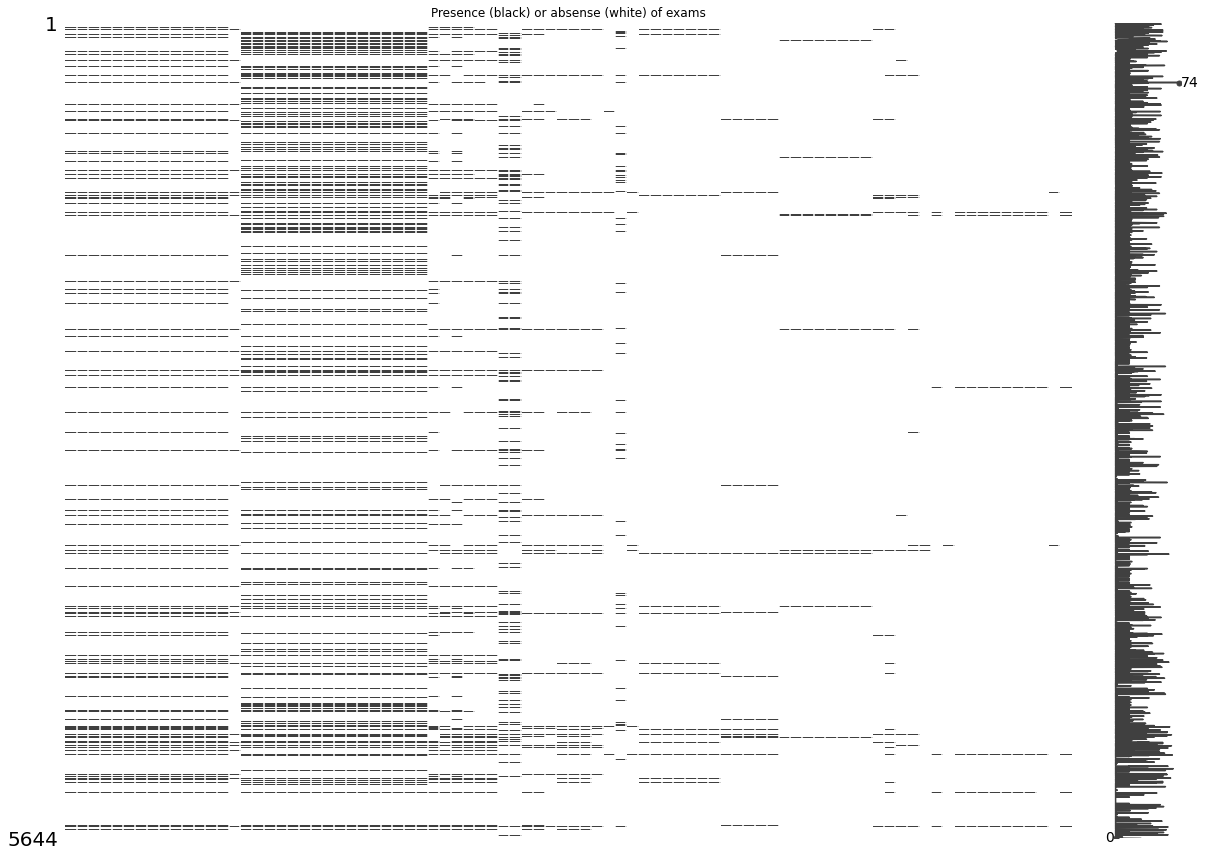

In [ ]:
# Nullity Matrix - Presence/Ausence of data
msno.matrix(exams_performed, figsize=(20, 15))
plt.title("Presence (black) or absense (white) of exams");

از طریق این طرح می توان الگوهای بین برخی از ستون ها (امتحان) را مشاهده کرد. با توجه به این فرض، بیایید درصد گمشده هر ستون را ببینیم و سعی کنیم هر رابطه ای را پیدا کنیم:

In [ ]:
missing = calculate_nan_pct(exams_performed)

In [ ]:
# How many cols do I have in each missing threshold
missing.drop(['nanValues'], axis=1).groupby(by='nanValuesPct').count()

,index
nanValuesPct,
76.0,16
85.5,2
89.3,12
89.4,2
90.9,1
91.0,1
92.5,1
93.0,1
93.4,2


با توجه به این نتایج، واضح است که ما یک همبستگی داریم، زیرا درصد گمشده برای برخی از ستون‌ها مقدار یکسانی دارند (آنها منحصر به فرد هستند). حالا بیایید امتحانات را با چند آستانه گروه بندی کنیم:

     T1: کمتر از 80٪ موارد از دست رفته
     T2: بین 80 تا 90 درصد موارد گمشده
     T3: بین 90 تا 95 درصد موارد گمشده
     T4: بالاتر از 95٪

In [ ]:
t1 = list()
t2 = list()
t3 = list()
t4 = list()

for i in range(0, len(missing)):
    if missing.loc[i, 'nanValuesPct'] < 80.0:
        t1.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] >= 80.0 and missing.loc[i, 'nanValuesPct'] < 90.0:
        t2.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] >= 90.0 and missing.loc[i, 'nanValuesPct'] < 95.0:
        t3.append(missing.loc[i, 'index'])
    elif missing.loc[i, 'nanValuesPct'] > 95.0:
        t4.append(missing.loc[i, 'index'])

In [ ]:
print('## T1')
print(t1)
print('## T2')
print(t2)
print('## T3')
print(t3)
print('## T4')
print(t4)

## T1
['respiratory_syncytial_virus', 'influenza_a', 'influenza_b', 'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus', 'coronavirus_hku1', 'parainfluenza_3', 'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4', 'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009', 'bordetella_pertussis', 'metapneumovirus']
## T2
['hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume_', 'red_blood_cells', 'lymphocytes', 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)', 'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_(mch)', 'eosinophils', 'mean_corpuscular_volume_(mcv)', 'monocytes', 'red_blood_cell_distribution_width_(rdw)', 'influenza_b,_rapid_test', 'influenza_a,_rapid_test']
## T3
['neutrophils', 'urea', 'proteina_c_reativa_mg/dl', 'creatinine', 'potassium', 'sodium', 'strepto_a']
## T4
['serum_glucose', 'alanine_transaminase', 'aspartate_transaminase', 'gamma-glutamyltransferase\xa0', 'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin', 'alkalin

### ارزیابی آستانه های پیشنهادی در یک ماتریس گمشده (ترتیب صعودی)

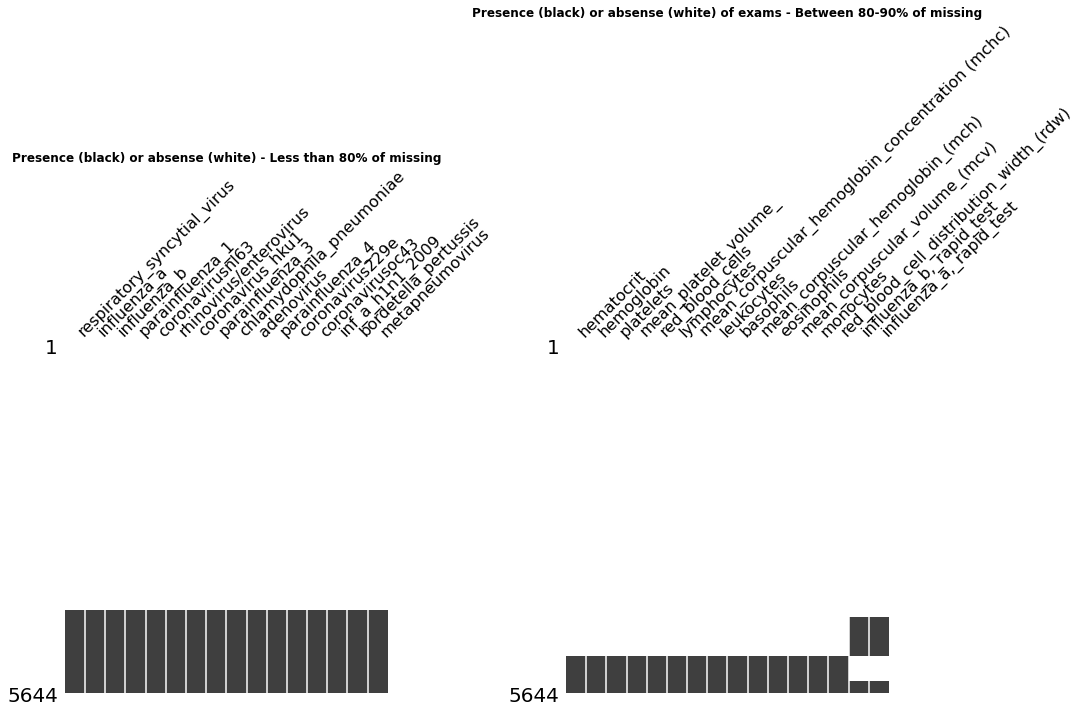

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))

# Threshold 1
df_threshold = exams_performed[t1]
msno.matrix(df_threshold, sort='ascending', ax=axes[0], sparkline=False)
axes[0].set_title("Presence (black) or absense (white) - Less than 80% of missing", fontweight="bold");
# Threshold 2
df_threshold = exams_performed[t2]
msno.matrix(df_threshold, sort='ascending', ax=axes[1], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Between 80-90% of missing", fontweight="bold");

plt.tight_layout()

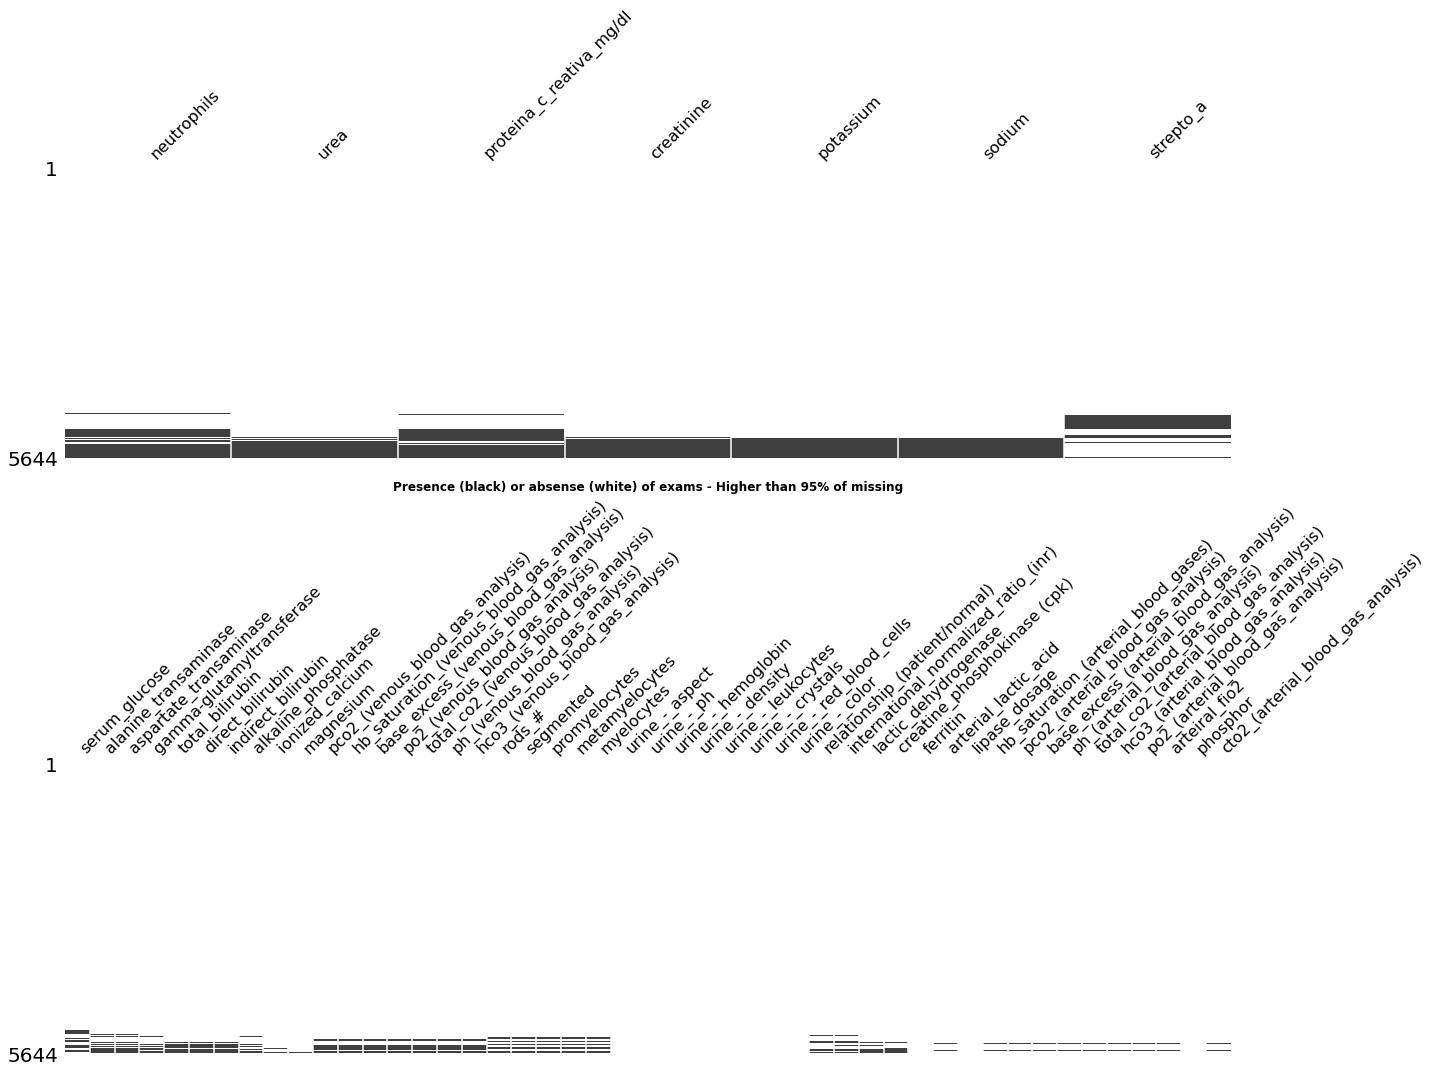

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,15))

# Threshold 3
df_threshold = exams_performed[t3]
msno.matrix(df_threshold, sort='ascending', ax=axes[0], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Between 90 - 95% of missing", fontweight="bold");
# Threshold 4
df_threshold = exams_performed[t4]
msno.matrix(df_threshold, sort='ascending', ax=axes[1], sparkline=False)
axes[1].set_title("Presence (black) or absense (white) of exams - Higher than 95% of missing", fontweight="bold");

plt.tight_layout()

واضح است که در اینجا الگویی برای همه آستانه‌ها وجود دارد: حضور شما در یک نوع اتفاق می‌افتد و نشان‌دهنده همبستگی بین آنهاست (وقتی یکی ساخته شد، دیگری رخ می‌دهد). علاوه بر این، یک دلیل نظری در پشت این موضوع وجود دارد، به عنوان مثال گروه اول آزمایشات مربوط به بیماری های تنفسی را ارائه می دهند، گروه دوم مربوط به آزمایش خون و دو گروه آخر دارای تنوع بیشتری هستند.
با توجه هدف این مرحله ( حفظ حداکثر تعداد ردیف برای تشخیص کرونا ) مقادیر لیست چهارم را حذف می کنم زیرا:
     مقدار نمونه کوچک (با توجه به آستانه من حداکثر 225 ردیف دارم)
     این گروه همبستگی بالایی بین مقادیر از دست رفته نشان نمی دهد، این نشان می دهد که اگر بخواهم خطوط کاملی داشته باشم احتمالاً چند خط در مقایسه با گروه های دیگر خواهم داشت.

In [ ]:
# Remove threshold 4
exams_performed.drop(axis=1, inplace=True, columns=t4)
df.drop(axis=1, inplace=True, columns=t4)

### ارزیابی ردیف های کامل با توجه به حد آستانه داده شده 

In [ ]:
# T1
df_complete = exams_performed[t1]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  1352


In [ ]:
# T2
df_complete = exams_performed[t2]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  196


In [ ]:
# T3
df_complete = exams_performed[t3]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  22


با توجه به تصویر داده شده از ردیف های کامل هر لیست لیست اول یک پارچه تر است ولی لیست دوم فقط صد و نود و شش ردیف کامل را نشان می دهد حالا بیاییم دو ستون که از لحاظ ماهیت آزمایش با دیگر متغیرهای لیست متفاوتن را حذف کنیم(rapid test)

In [ ]:
t2_new = set(t2) - set(['influenza_a,_rapid_test','influenza_b,_rapid_test'])

# T2 NEW
df_complete = exams_performed[t2_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  598


Removing those two columns we have more complete rows only with blood exams. Let's see this two columns with T1:

In [ ]:
t1_new = t1 + ['influenza_a,_rapid_test','influenza_b,_rapid_test']
# T1 NEW
df_complete = exams_performed[t1_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  265


Let's see for the third group without non-uniform missing:

In [ ]:
t3_new = set(t3) - set(['neutrophils', 'strepto_a'])
# T1 NEW
df_complete = exams_performed[t3_new]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  292


###ازیابی ترکیب گروه ها 

بر اساس تجزیه و تحلیل قبلی، گروه های مختلفی را ارزیابی خواهم کرد که تعداد ردیف ها را به حداکثر می رساند

In [ ]:
g1 = list(t1)
g2 = list(t2_new)
g3 = list(t3_new)

e1 = ['influenza_a,_rapid_test','influenza_b,_rapid_test']
e2 = ['neutrophils', 'strepto_a']

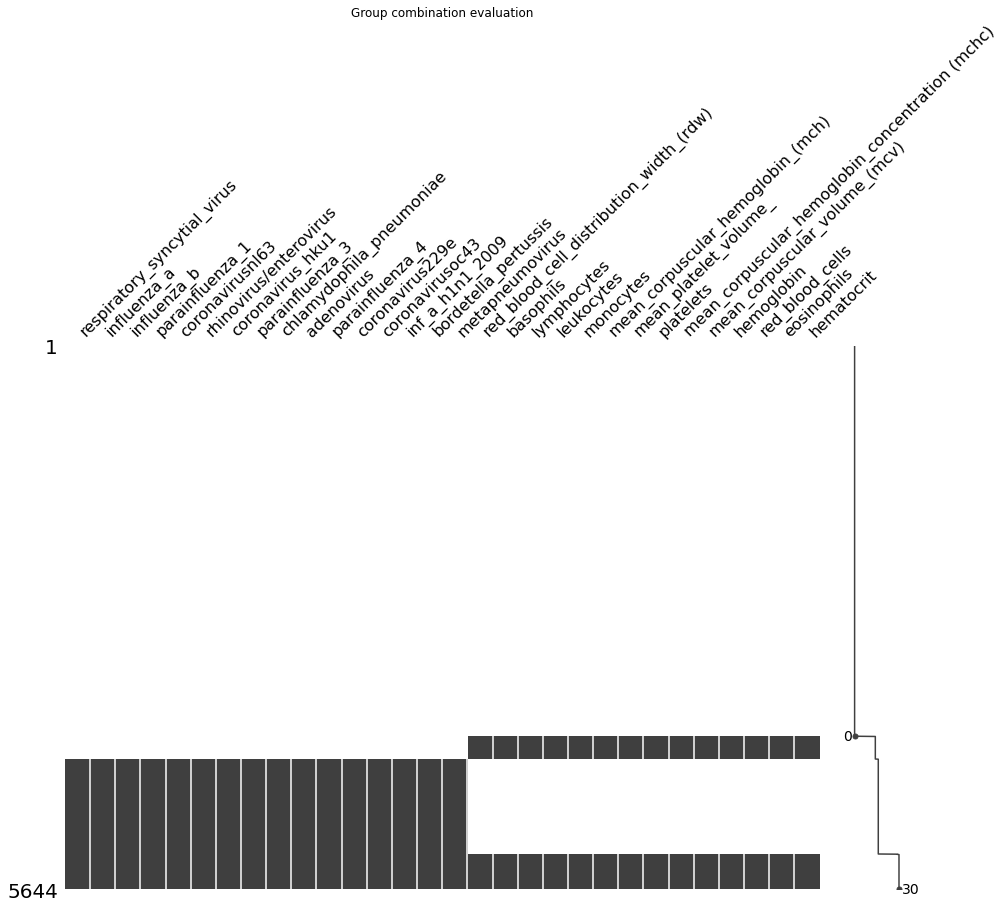

In [ ]:
df_threshold = exams_performed[g1 + g2]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

In [ ]:
g_comb = g1 + g2
# T1 NEW
df_complete = exams_performed[g_comb]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  362


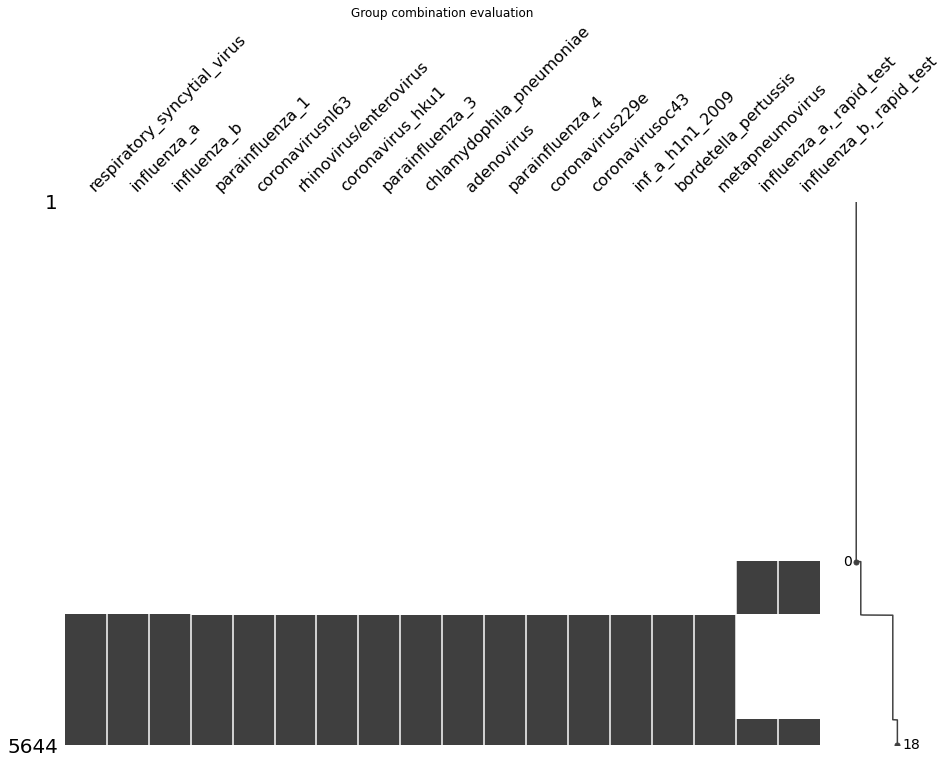

In [ ]:
df_threshold = exams_performed[g1 + e1]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

In [ ]:
g_comb = g1 + e1
# T1 NEW
df_complete = exams_performed[g_comb]
# Drop any NaN sample, creating a copy of my dataset
df_complete.dropna(how='any', inplace=True)
df_complete.index = range(0, len(df_complete.index))

# Show number of rows
print('Complete rows: ', len(df_complete))

Complete rows:  265


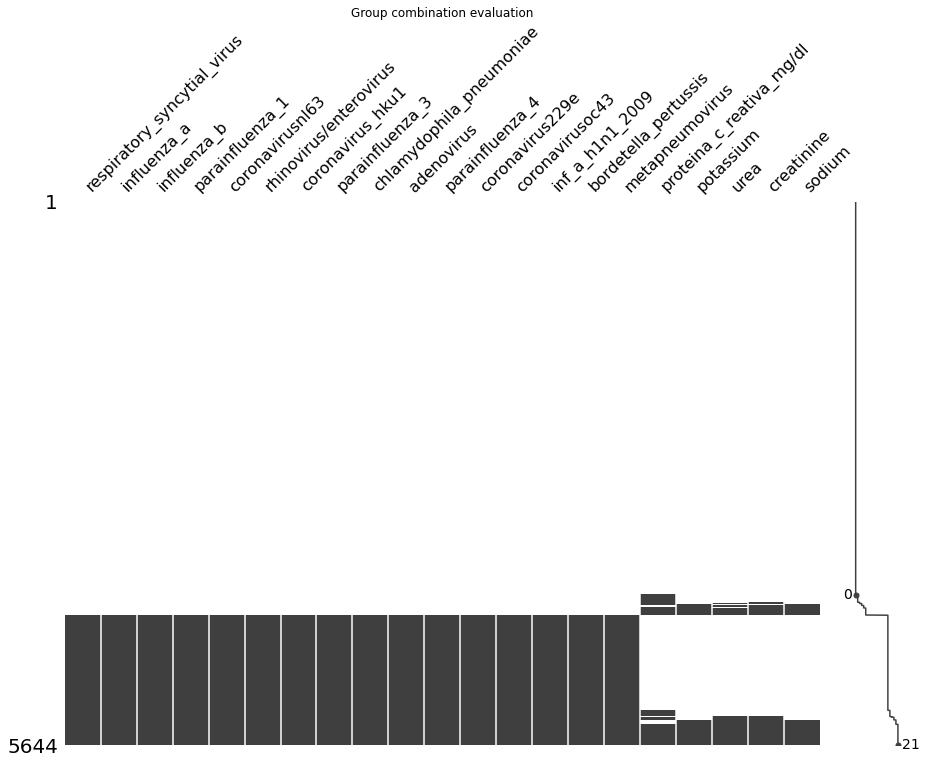

In [ ]:
df_threshold = exams_performed[g1 + g3]
msno.matrix(df_threshold, sort='ascending', figsize=(15, 10))
plt.title("Group combination evaluation");

## Conclusions
با توجه به تجزیه و تحلیل گسترده و هدفم: به حداکثر رساندن تعداد ردیف‌های کامل تصمیم می‌گیرم:

     متغیرهای آزمایش خون (g2) را با افزایش سن به عنوان ویژگی حفظ کنید
     سایر ویژگی های طبقه بندی شده به عنوان بیماری تنفسی (g1) حفظ خواهد شد، اما برای مطالعات EDA

گروه دیگر را نگه نخواهم داشت و دلایل آن عبارتند از:
- **(e1)** `['influenza_a,_rapid_test','influenza_b,_rapid_test']`: نگه داشتن این متغیرها بیش از 300 ردیف نمونه هزینه خواهد داشت. علاوه بر این، آنها با توجه به متغیرهای «آنفلوانزا_a» و «آنفلوانزا_ب» در گروه 1 اضافی هستند.
- **(e2)** `['neutrophils', 'strepto_a']`: مجموعه داده کوچک 
- **(g3)** `['sodium', 'creatinine', 'proteina_c_reativa_mg/dl', 'potassium', 'urea']`: مجموعه داده کوچک 



متغیرهایی که در دو گروه g1 و g2 در مجموعه داده حفظ خئاهند شد 
- بیماری های تنفسی 

`'respiratory_syncytial_virus'
 'influenza_a'
 'influenza_b'
 'parainfluenza_1'
 'coronavirusnl63'
 'rhinovirus/enterovirus'
 'coronavirus_hku1'
 'parainfluenza_3'
 'chlamydophila_pneumoniae'
 'adenovirus'
 'parainfluenza_4'
 'coronavirus229e'
 'coronavirusoc43'
 'inf_a_h1n1_2009'
 'bordetella_pertussis'
 'metapneumovirus']`
 
- آزمایش خون 

`'hematocrit',
 'red_blood_cells',
 'basophils',
 'eosinophils',
 'mean_corpuscular_volume_(mcv)',
 'leukocytes',
 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
 'platelets',
 'hemoglobin',
 'monocytes',
 'mean_platelet_volume_',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_(mch)',
 'red_blood_cell_distribution_width_(rdw)'`
 
 در پایان، مجموعه داده ای را ارائه می کنم که از آن ستون ها با 598 ردیف کامل تشکیل شده است. برای انجام این کار لازم است فرض کنیم که **مقادیر گم شده** در متغیرهای بیماری تنفسی **به معنی عدم تشخیص (0)** است که این موارد از دست رفته را حذف می کند.

## (4) ایجاد یک مجموعه داده کامل 

In [ ]:
# Variables
others_cols = ['sars-cov-2_exam_result', 'patient_admission', 'patient_age_quantile']
respiratory_diseases = sorted(g1)
blood_exams = sorted(g2)

# Baseline diseases for further evaluation
#baseline_diseases = ['influenza_a', 'influenza_b', 'inf_a_h1n1_2009', 'rhinovirus/enterovirus']

In [ ]:
# Fill nan values as not detected (0)
df[respiratory_diseases] = df[respiratory_diseases].fillna(0)

In [ ]:
# Dataset A
dataset = df[others_cols + blood_exams + respiratory_diseases].dropna(how='any')
# Reset index
dataset.reset_index(inplace=True)
# Report
print('Dataset have',len(dataset), 'rows.')

Dataset have 598 rows.


# مهندسی ویژگی 

Gبا توجه به این واقعیت که مجموعه داده نهایی ما دارای برخی از متغیرهای طبقه بندی شده است: شناسایی یا عدم شناسایی یک نوع ویروس/باکتری مرتبط با یک بیماری تنفسی، مانند:
- respiratory_syncytial_virus
- influenza_a 
- influenza_b
- parainfluenza_1
- coronavirusnl63
- rhinovirus/enterovirus
- coronavirus_hku1
- parainfluenza_3
- chlamydophila_pneumoniae
- adenovirus
- parainfluenza_4
- coronavirus229e
- coronavirusoc43 
- inf_a_h1n1_2009
- bordetella_pertussis
- metapneumovirus

با توجه به تعداد بالای ستون‌ها، تمام اطلاعات را در یک ستون باینری منحصربفرد جمع می‌کنم: «بیماری_تنفسی دارند» که در آن عدد 1 به این معنی است که بیمار حداقل یک نوع بیماری تنفسی دارد، در غیر این صورت صفر دریافت می‌کند. این کار برای ایجاد یک متغیر جدید برای استفاده به عنوان تحلیل پایه (توضیح داده شده در مقاله) انجام شد.

PS: علاوه بر این، مشکلی را حل می کند که در آن اکثر ستون های تنفسی پس از کاهش مجموعه داده به 598 ردیف کامل، ثابت می شوند.

## Feature Engineering in Sets for Dataset

In [ ]:
for i in range(0, len(dataset)):
    for j in respiratory_diseases:
        if dataset.loc[i, j] == 1: # I need only one column to say if will be a 1
            dataset.loc[i,'have_respiratory_disease'] = 1
            break
        else:
            dataset.loc[i,'have_respiratory_disease'] = 0

In [ ]:
# Change variable type
dataset.have_respiratory_disease = dataset.have_respiratory_disease.astype('uint8')

## ارزیابی مهندسی ویژگی ( نمودار) 

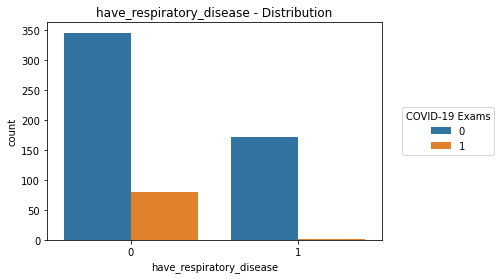

In [ ]:
sns.countplot(x='have_respiratory_disease', hue='sars-cov-2_exam_result', data=dataset)
plt.legend(title='COVID-19 Exams', loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.title('have_respiratory_disease - Distribution');

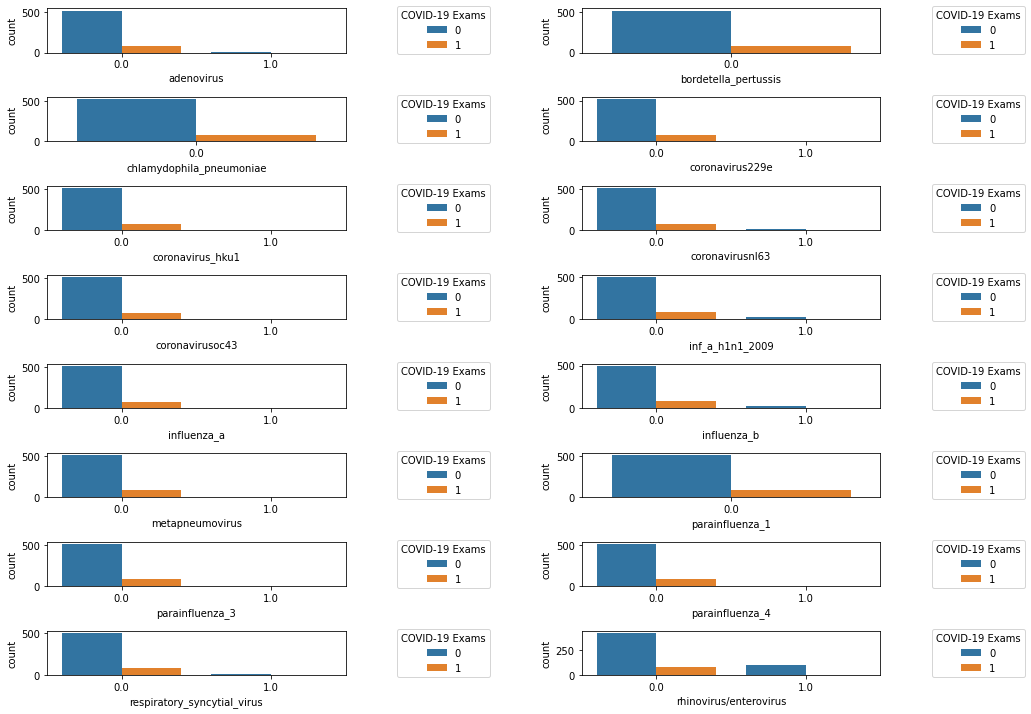

In [ ]:
# PLOT - Barplots over our variables
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15,10))
r = 0 # Index row
c = 0 # Index col

for f in respiratory_diseases:
    # Count Plot
    sns.countplot(x=f, hue='sars-cov-2_exam_result', data=dataset, ax=axes[r][c])
    # Plot configs
    axes[r][c].legend(title='COVID-19 Exams', loc='center right', bbox_to_anchor=(1.5, 0.5))
    # Index control
    c += 1
    if c > 1:
        c = 0
        r += 1

plt.tight_layout()

با این نمودارها می توان مشاهده کرد که ستون های بیماری تنفسی، از جمله ستون ایجاد شده، با توجه به اینکه در موارد منفی بیشتر رخ می دهند، می توانند جداکننده ای از موارد منفی به مثبت باشند.

# ایجاد مجموعه داده 

## ایجاد مجموعه داده نهایی برای داده های اکتشافی و توسعه مدل 

In [ ]:
dataset = dataset[others_cols + blood_exams + ['have_respiratory_disease']]

## اطلاعات عمومی در مورد  مجموعه داده 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   sars-cov-2_exam_result                            598 non-null    int64  
 1   patient_admission                                 598 non-null    object 
 2   patient_age_quantile                              598 non-null    int64  
 3   basophils                                         598 non-null    float64
 4   eosinophils                                       598 non-null    float64
 5   hematocrit                                        598 non-null    float64
 6   hemoglobin                                        598 non-null    float64
 7   leukocytes                                        598 non-null    float64
 8   lymphocytes                                       598 non-null    float64
 9   mean_corpuscular_hemo

In [ ]:
# COVID-19 Distribution - df_a
dataset['sars-cov-2_exam_result'].value_counts()

0    517
1     81
Name: sars-cov-2_exam_result, dtype: int64

## خروجی گرفتن از نتیجه پیش پردازش 

In [ ]:
dataset.to_csv('results_preProcessing/dataset_processed.csv', sep=',', index=False)